<a href="https://colab.research.google.com/github/josephknguyen/Projects-and-Labs/blob/main/Adaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

df.tail()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


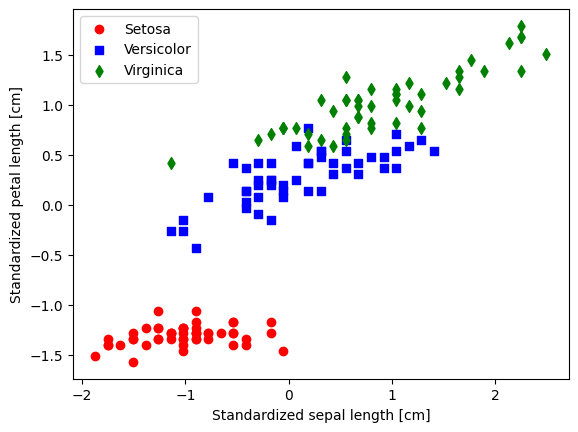

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# select setosa, versicolor and virginica
ys = df.iloc[0:150, 4].values

# extract sepal length and petal length
Xs = df.iloc[0:150, [0, 2]].values

def standardize(col):
  return((col-np.mean(col))/np.std(col))
Xs[:,0]= standardize(Xs[:,0])
Xs[:,1]= standardize(Xs[:,1])

# plot data
plt.scatter(Xs[:50, 0], Xs[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(Xs[50:100, 0], Xs[50:100, 1],
            color='blue', marker='s', label='Versicolor')
plt.scatter(Xs[100:150, 0], Xs[100:150, 1],
            color='green', marker='d', label='Virginica')

plt.xlabel('Standardized sepal length [cm]')
plt.ylabel('Standardized petal length [cm]')
plt.legend(loc='upper left')
#plt.axis('equal')

plt.show()

In [ ]:
import numpy as np

# The Adaline class

class Adaline:
    """ADAptive LInear NEuron classifier.

        Parameters
        ------------
        eta : float
        Learning rate (between 0.0 and 1.0)
        n_iter : int
        Passes over the training dataset.
        shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent
        cycles.
        random_state : int
        Random number generator seed for random weight
        initialization.


        Attributes
        -----------
        w_ : 1d-array
        Weights after fitting.
        b_ : Scalar
        Bias unit after fitting.
        losses_ : list
        Mean squared error loss function value averaged over all
        training examples in each epoch.


        """
    def __init__(self, n_iter=10, eta=0.01, shuffle=True, random_state=None):
        self.n_iter = n_iter
        self.eta = eta
        self.shuffle = shuffle
        self.random_state = random_state
        self.w_initialized = False

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        self.w_ = np.zeros(X.shape[1])
        self.b_ = np.float_(0.)
        self.updates_ = []
        self.errors_ = []
        self.empir = []
        self.empir_len = self.n_iter

        for _ in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            empir = []
            for xi, target in zip(X, y):
              losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self.initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True

    def _update_weights(self, xi, target):
      output = self.activation(self.net_input(xi))
      error = (target - output)
      self.w_ += self.eta * 2.0 * xi * (error)
      self.b_ += self.eta * 2.0 * error
      loss = error**2
      return loss

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)





In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

In [ ]:
# Select versicolor and virginica
X = np.concatenate((Xs[50:100,:2],Xs[100:150,:2]), axis=0)
y = np.concatenate((ys[50:100],ys[100:150]), axis=0)
y = np.where(y == 'Iris-versicolor', 0, 1)


Learning rate: 0.001


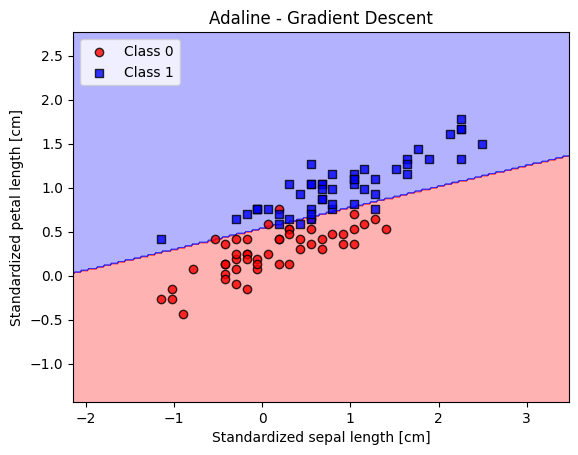

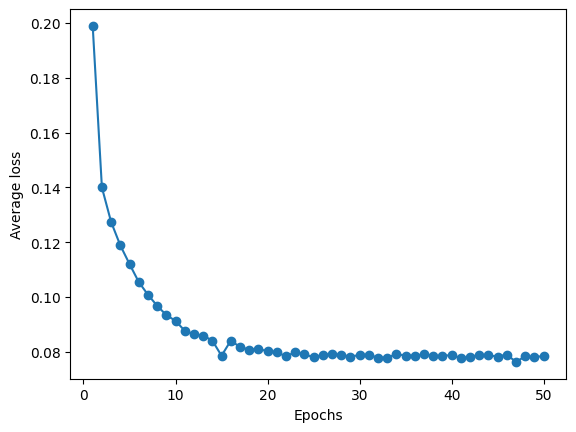

Learning rate: 0.01


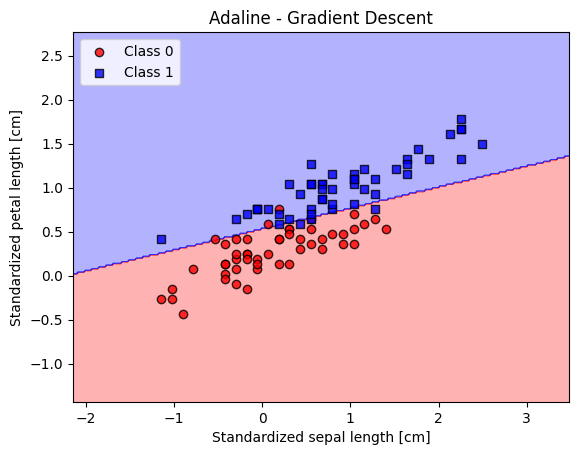

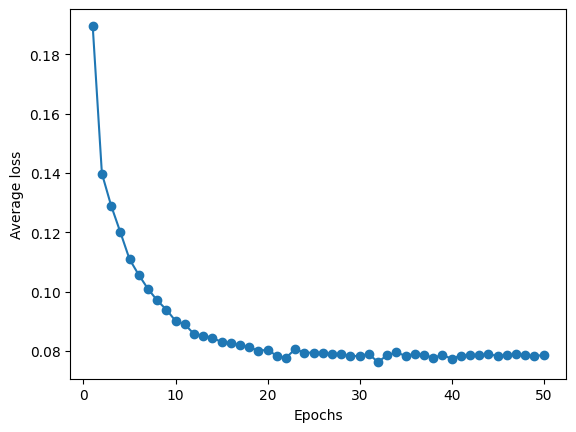

Learning rate: 0.1


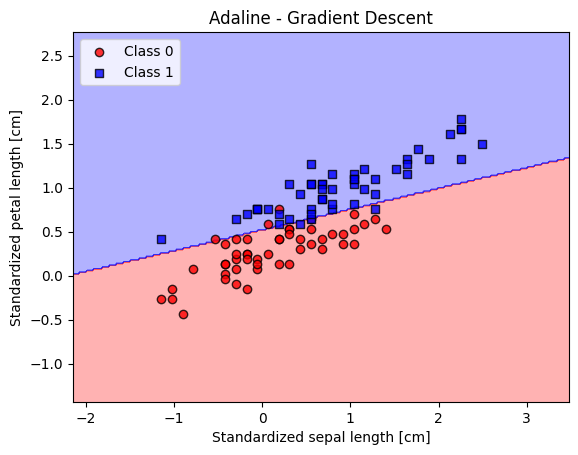

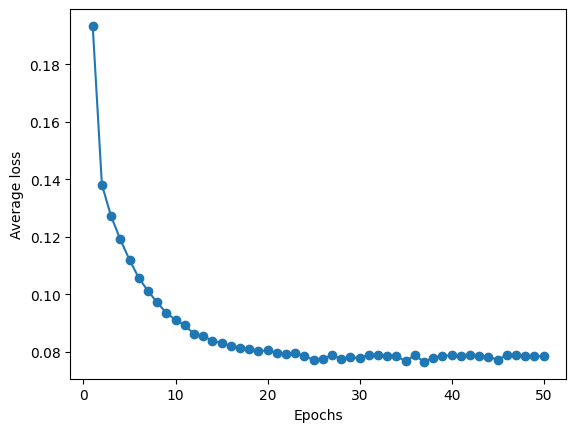

In [ ]:
learning_rates = [0.001, 0.01, 0.1]

for i in learning_rates:
  print(f'Learning rate: {i}')
  adaline = Adaline(n_iter=50, eta=0.01)
  adaline.fit(X, y)
  plot_decision_regions(X, y, classifier=adaline)
  plt.title('Adaline - Gradient Descent')
  plt.xlabel('Standardized sepal length [cm]')
  plt.ylabel('Standardized petal length [cm]')
  plt.legend(loc='upper left')
  plt.show()
  plt.plot(range(1, len(adaline.losses_) + 1), adaline.losses_, marker='o')
  plt.xlabel('Epochs')
  plt.ylabel('Average loss')
  plt.show()

In [ ]:
best_learning_rate = 0.1
adaline = Adaline(n_iter=50, eta=best_learning_rate)
adaline.fit(X, y)

In [ ]:
output_arr = adaline.predict(Xs[50:150])
err = 0
test = []
for i in range(len(ys)):
  if (ys[i] == "Iris-versicolor"):
    test.append(0)
  if (ys[i] == "Iris-virginica"):
    test.append(1)

for i in range(len(test)):
  if (output_arr[i]!=test[i]):
    err+=1

print("Error rate =", err, "%")

Error rate = 10 %


In [ ]:
class all_pair_classifier:

  def __init__(self, ppn1, ppn2, ppn3, n_iter=60):
    self.n_iter = n_iter
    self.ppn1 = ppn1
    self.ppn2 = ppn2
    self.ppn3 = ppn3

  def predict(self, X):
    #output list
    output = []
    for x in X:
      #setosa=index 1, versicolor=index2, virginica=index3
      votes = np.array((0,0,0))

      #train all 3 adalines
      adaline1 = self.ppn1.predict(x) #setosa (0) vs versicolor (1)
      adaline2 = self.ppn2.predict(x) #setosa(0) vs virginica (1)
      adaline3 = self.ppn3.predict(x) #versicolor(0) vs virginica (1)

      setosa = 0
      versicolor = 0
      virginica = 0

      if(adaline1 == 0):
        setosa += 1
      elif(adaline1 == 1):
        versicolor +=1
      if(adaline2 == 0):
        setosa += 1
      elif(adaline2 == 1):
        virginica +=1
      if(adaline3 == 0):
        versicolor += 1
      elif(adaline3 == 1):
        virginica +=1

      votes[0] = setosa
      votes[1] = versicolor
      votes[2] = virginica

      output.append(votes.argmax())
    return np.array(output)

In [ ]:
X = np.concatenate((Xs[0:50,:2],Xs[50:100,:2]), axis=0)
y = np.concatenate((ys[0:50],ys[50:100]), axis=0)
y = np.where(y == 'Iris-setosa', 0, 1)

# Train an Adaline using the setosa and versicolor data
ppn1 = Adaline(n_iter=20, eta=best_learning_rate)
ppn1.fit(X, y)

X2 = np.concatenate((Xs[0:50,:2],Xs[100:150,:2]), axis=0)
y2 = np.concatenate((ys[0:50],ys[100:150]), axis=0)
y2 = np.where(y2 == 'Iris-setosa', 0, 1)

# Train an Adaline using the setosa and virginica data
ppn2 = Adaline(n_iter=20, eta=best_learning_rate)
ppn2.fit(X2, y2)

X3 = np.concatenate((Xs[50:100,:2],Xs[100:150,:2]), axis=0)
y3 = np.concatenate((ys[50:100],ys[100:150]), axis=0)
y3 = np.where(y3 == 'Iris-versicolor', 0, 1)

# Train an Adaline using the versicolor and virginica data
ppn3 = Adaline(n_iter=50, eta=best_learning_rate)
ppn3.fit(X3, y3)

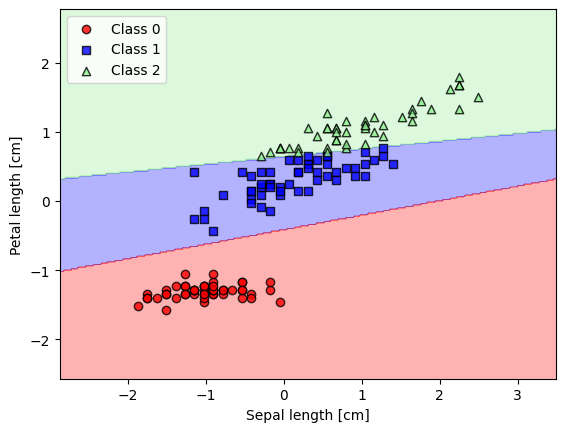

In [ ]:
multi = all_pair_classifier(ppn1, ppn2, ppn3) #train all three adalines

plot_decision_regions(Xs, multi.predict(Xs), multi)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [ ]:
output_arr = multi.predict(Xs)
err = 0
test = []
for i in range(len(ys)):
  if (ys[i] == "Iris-setosa"):
    test.append(0)
  if (ys[i] == "Iris-versicolor"):
    test.append(1)
  if (ys[i] == "Iris-virginica"):
    test.append(2)
  if (output_arr[i]!=test[i]):
    err+=1

print("Error rate = ", err/150*100, "%")

Error rate =  4.666666666666667 %
